# Statistical Hypothesis Tests

This notebook is a summary of the most important statistical tests in python:
1. T-Test
    - Independet samples
    - Related samples
    - One sample
2. ANOVA
3. Goodness of Fit, $\chi^2$
4. Acceptance sampling

For continuous variables, different relationship cheks are:

5. Correlation
    - Spearman
    - Kendall

Necessary assumption tests and plots are covered too:

6. Assumption checks
    - Normality
        - QQ plots
        - Boxplots
        - Shapiro-Wilk test
    - Homoscedasticity = Equal variances
        - Rule of Thumb Varince Check
        - Boxplots
        - Bartlett's test
        - Levine's test

Some alternative tests for the case in which assumptions are not met are provided too:

7. Non-parametric test
    - Wilcoxon signed rank (vs. Related Samples T test)
    - Mann-Whitney / Wilcoxon ranked sum (vs. Independent Samples T test)
    - Kruskall Wallis (vs. Independent/Between One-Way ANOVA)
    - Friedman (vs. Repeated Measures/Within One-Way ANOVA)

Finally, an appendix of some important statistical descriptives is provided: 

8. Descriptive statistic values
    - Mean, Variance, Standard Deviation
    - Kurtosis
    - Skewness
    - Effect size
    - Condifence intervals (page 15 of my notes)

Sources:

https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0

https://www.statisticshowto.com/probability-and-statistics/t-test/#PairedTTest

https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

https://www.itl.nist.gov/div898/handbook/eda/section3/eda35f.htm

https://www.statology.org/chi-square-goodness-of-fit-test-python/

## Hypothesis Testing

Let's say we have a theory that explains some relationship between variables. Hypothesis testing helps determining how plausible that theory is. We basically compare our theory/hypothesis to the default explanation, i.e., there is no relationship. For that, we collect some outcome measures under the effects of our hypothesis factors and define:

- `H0`: Null hypothesis, the one we usually want to reject. Example: *"The new drug has no effect on the recovery time, e.g. mean recovery time of placebo = drug"*.
- `Ha`: Alternate hypothesis (aka `H1`, `HA`), the one we usually want to confirm. *"The new drug does have an effect on the recovery time, e.g. mean recovery time of drug is different/shorter than that of the placebo"*.
- `alpha` (threshold significance, or significance level): typically set to `0.05`, p-value threshold below which we can reject `H0` and take `Ha` as probable. We basically acknowledge that there is an `alpha` chance of `H0` being correct, thus, wrongly rejected. Therefore, `alpha` is the **Type-I error**, i.e., the **false positive** error. We usually compute the p-value of `H0` and check that it is below the threshold `alpha`. We can also compute the critical statistic for `alpha` and check that our statistic is in the limits.

Important concepts in hypothesis testing:
- Factor: independent variable that we vary and expect effects in the dependent variables we measure
- Treatment, Condition, Level, Group: especially in the medical context, a factor can be understood as a treatment, e.g. a new drug, which can be administered in different dossages or levels and still be the same factor. Each treatment level can be understood as a condition which can be assigned to a group. However, the mapping between different factor-levels and groups can vary. The important thing is to differentiate: dependent variables (measured) and dependent variables (factors and their levels),
- Assumptions: each hypothesis test makes its assumptions, which need to be checked. If not fullfilled, another test must be carried out, eventually a non-parametric test.
- Degree of freedom, `df`: parameters for the probability distributions used in the hypothesis tests. They often refer to the number of groups or samples.
- Between vs within variation: by analyzing the difference (ratio) of the variance (error) for different groups and inside each group we can determine if the factor has really an effect on the measured outcome. Therefore, most tests compute some ratio between the differences between the groups and the differences within the groups.
- Repeated measures: a study is a repeated measures or within-subject (as opposed to between) if we use the same group of people/objects for all different treatments; the dependent variables are measured at different point in time.
- Parametric vs. non-parametric tests: parametric hypothesis tests use condituous distributions to check whether the computed statistic is associated to significantly different groups or not. However, parametric tests are based on some assumptions. If these are not fullfilled, non-parametric tests can be used (usually less powerfull, though). Non-parametric tests do not use continuous distributions and are sometimes based on some ranking strategies.
- PDF, CDF, PPF
    - PDF = Probability density function: the distribution function curve with area 1 
    - CDF = Cummulative distribution funcion: integral of PDF; CDF(x) = int(PDF,0,x). Basically, it is used to get the area (accumulated probability) below the distribution curve
    - PPF = Percent point function: inverse of CDF, we get the x value of the RV for a given at q (% of accumulated area)
- `beta` (`1-beta` = Power): **Type-II error**, i.e., the **false negative** error, the worst of the errors and the one we'd like to avoid. A typical value for the power is `1-beta = 0.8`. We can build a `2x2`confusion matrix with `H0` and `HA` being chosen/rejected. In the cells, we would have `alpha` and `beta`
    - p(choose `Ha`|`Ha` is true) = `1-beta` = power
    - p(choose `H0`|`H0` is true) = `1-alpha`
    - p(choose `Ha`|`H0` is true) = `beta` = p(type II error)
    - p(choose `H0`|`Ha` is true) = `alpha` = p(type I error)
- Sample size (`N`): how many samples do we need to draw meaningful conclusions? Usually that is studied in a **power analysis**, when studying the **experimental design** (see below).
- Effect size (`ES`): magnitude of the effect that is significant; in addition to the significance of the treatment (p-value), we compute how big that effect is. Depending on the statistical test, different `ES` computations can be done. A typical one is Cohen's d. Given two samples A and B for which variable x is measured:
    - $d = ES = \frac{mean(x_A) - mean(x_B)}{S_{AB}}$
    - $S_{AB} = \sqrt{\frac{(N_A-1)*S_A^2 + (N_B-1)*S_B^2}{N_A+N_B-2}}$, pooled standard deviation
    - Then:
        d < 0.2: small effect,
        0.2 < d < 0.5 medium,
        d > 0.5 large

## Experimental Design

- We need to maintain all possible influences constant when we administer any treatment, i.e., maintain any known factors constant, as well as any cicumstances that might hide unknown factors
- Good practices
    - Randomization: systematically alter order of treatments
    - Use groups of similar people
    - Use control groups: groups that do not receive any treatment
    - Use blind trials: single-blind (participant is agnostic), double-blind (participant & tester agnostic), triple-blind (participant, tester, statiscian agnostic)
- Consider **power analysis**
    - These four parameters are inter-related, so we can obtain one given the other three:
        - effect size `ES` (magnitude of the effect),
        - `alpha` (type I error),
        - `beta` (type II error),
        - sample size `N` (number of measurements)
    - Typical power analyses done:
        - A priori or before the study: given `ES`, `alpha`, `beta`, compute the sample size `N` required for them. While `alpha` and `beta` are set as requirements, `ES` is computed with pilot studies or looking at similar studies.
        - Post-hoc or after the study: given `ES`, `alpha`, sample size `N`, compute the type II error `beta` or power (`1-beta`) of the study.

## 1. T-Test

A T-Test compares two **averages** (means) and determines the likelyhood that they belog to the same or different distributions. The differences between means can be due to the fact that they belong to different distributions, or they could happen by chance.

Typical example: The efficiency of a drug is tested: a control group receives a placebo and the other group the drug; the recovery time is measured. Are the means of both sampled groups effectively the same, i.e., do they belong to the same distribution?

Types of T-Tests:
1. **One sample T-test**: the mean of the samples is compared to a known (theoretical) population mean.
2. **Independent samples T-test**: the means of two independent sample sets are compared.
3. **Paired/Related/Repeated samples T-test**: the means of the same group (samples) are compared at different times or treatments.

The T score or statistic is computed and its associated probability evaluated in the Student's T distribution.
- The T score is the ration between the difference between the groups and the difference within the groups
- The larger the T score, the more likely we have two different distributions
- The T distirbution is similar in shape to the normal distribution, but with fatter tails for smaller sample sizes
- Unique parameter of the T distribution: Defree-of-freedom: `df = N - 1`, sample size; `T(df->inf) = Normal(0,1)`

**T statistic computation**:
- One sample with $x_i$ measurements:
    - $T = \frac{mean(x) - m}{\frac{s}{\sqrt{N}}}$
    - $m$: population mean
    - $N$: sample size
    - $s$: sample standard deviation: $s^2 = \frac{\sum{x-mean(x)}}{N-1}$
    - $mean(x)$: sample mean
    - `df` = N-1

- Two samples (independent):
    - $T = \frac{mean(x_A) - mean(x_B)}{s_{AB}*\sqrt{\frac{1}{N_A}+\frac{1}{N_B}}}$
    - $s_{AB} = \sqrt{\frac{(N_A-1)*s_A^2 + (N_B-1)*s_B^2}{N_A+N_B-2}}$, pooled standard deviation
    - `df` = $N_A + N_B - 2$

**Two-sided/tailed vs one-sided/tailed**:
- Test distributions can be symmetrical (e.g., Student's T distribution) or asymmetrical (e.g. F distribution for ANOVAs, or Chi-square tests)
    - Tests based on asymmetrical distributions are always one-sided
    - Tests based on symmetrical distributions can be one-sided or two-sided
- **One-sided** tests check if there is a difference between groups **in a specific direction**, e.g., one mean is expected bigger than the other.
- **Two-sided** tests check if there is a difference between groups **in any direction**, e.g., means expected to belong to different distributions.
- When we manually check the p-value given a statistic, we check the area under the curve in one extreme tail: 1-CDF(t). That is a one-sided test and p-value.
    - The two-sided p-value is 2x the one-sided one.
    - Why? because a value of t comes from the difference of means in one direction; we have an equivalent -t for the other direction, which takes the area of the other tail. Since the distribution is symmetrical, both areas are the same, thus, the complete p-value area is 2x one tail.
- Usually, the two-sided check is the go, which is also more conservative: higher p-value -> more difficult to reject `H0`.

**Assumptions**: 
- Measurements normally distributed: tested with boxplots, QQ-plots and Shapiro-Wilks test 
- Same variance; if not, it must be entered as `equal_var=False` and Welch's T-test is performed
- For the independent samples test: independent sampling of the population between groups

**IMPORTANT note**: do not use T-tests repeteadly in groups pairwise without corrections, because it leads to false positives (it increases type I error). Instead, use ANOVA.

### 1.1 Plotting the Student's T Distribution

In [1]:
import numpy as np
from scipy.stats import norm,t
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_values = [1, 10, 100]
linestyles = [':', '--', '-']
linecolors = ['red', 'green', 'blue']
x = np.arange(-10, 10, 0.01)

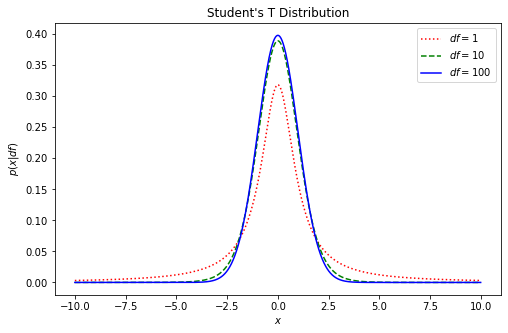

In [3]:
# Student's T Distribution: Probability Density Function
fig, ax = plt.subplots(figsize=(8, 5))
for (df,ls,lc) in zip(df_values, linestyles, linecolors):
    dist = t(df)
    # NOTE: if we have a discrete distribution, use plt.step(), not plt.plot()
    plt.plot(x, dist.pdf(x), color=lc, linestyle=ls, label='$df={}$'.format(df))
plt.xlabel('$x$')
plt.ylabel('$p(x|df)$')
plt.title("Student's T Distribution")
plt.legend()
plt.show()

### 1.2 Performing the Tests

#### Data

In [4]:
# Sythetic measurements
N = 100
# Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
# Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

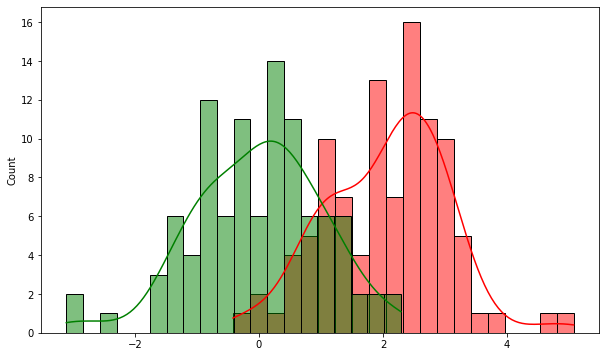

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(data=a,color='red',kde=True,bins=20)
sns.histplot(data=b,color='green',kde=True,bins=20)

#### Tests

After we check the assumptions (**normality**, see below), we can perform the tests.

In [6]:
# Several T-Tests are available, given arrays of measurement a and b:
# scipy.stats
# .ttest_1samp(a, popmean): mean of the sample compared to a population mean; two-sided
# .ttest_ind(a, b): two independent sample means compared; two-sided
# .ttest_rel(a, b): two related/repeated sample means compared; two-sided
# .ttest_ind_from_stats(ma, sa, na, mb, sb, nb): means of two independent samples from descriptive statistics compared; two-sided

In [7]:
# Two independent samples
t, p = stats.ttest_ind(a,b)

In [8]:
# p < 0.05 -> H0 can be rejected, both samples belong to two different distributions
print("t = " + str(t))
print("p = " + str(p))

t = 14.624417862969958
p = 2.5211409939190387e-33


In [9]:
# Two repeated samples
t, p = stats.ttest_rel(a,b)

In [10]:
# p < 0.05 -> H0 can be rejected, both samples belong to two different distributions
print("t = " + str(t))
print("p = " + str(p))

t = 14.010460754041388
p = 3.1330509334213255e-25


Observations:
- For both independent and paired/repeated samples, the T statistic and the `df`s vary, so the T distribution is different and the value check in there too, thus, a different p-value is obtained
- For larger sample sizes, the results are more conclusive

### 1.3 Alternative: Manual Computations

In [11]:
# Variance s^2 of each sample scaled with N-1 (ddof=1)
var_a = a.var(ddof=1) # (s_A)^2
var_b = b.var(ddof=1) # (s_B)^2

# Pooled standard deviation: standard deviation of both samples together
s_ab = np.sqrt(((len(a)-1)*var_a + (len(b)-1)*var_b)/(len(a)+len(b)-2))

# T statistic
t = (a.mean() - b.mean())/(s_ab*np.sqrt((1/len(a))+(1/len(b))))

In [12]:
print("t = " + str(t))

t = 14.624417862969958


In [13]:
# With T and df, we can get the p-value from the T distribution
df = len(a) + len(b) - 2
# p-value is obtained form the cummulative density function (CDF) with the given df
# since we want the remaining are under the PDF, we need to compute 1-CDF(t)
p = 1 - stats.t.cdf(t,df=df)
# Since we usually compute a 2-sided test (differences in any direction tested)
# we need to 2x the p-value
p *= 2.0
# Display
print("t = " + str(t))
print("p = " + str(p))

t = 14.624417862969958
p = 0.0


### 1.4 Plotting the Critical Value t_crit

The value of t for which the two distributions or groups start being different is determined by the significance level `alpha`.

In [14]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def plot_t_critical(df,alpha=0.05):
    # Set figure 
    plt.figure(figsize=(8, 4))
    # T distribution with df
    dist = t(df)
    # t range (x)
    x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
    # Critical value; PPF is the inverse of CDF
    t_crit = dist.ppf(1-alpha)
    # Plot values
    plt.plot(x, dist.pdf(x), alpha=0.6, label=' X ~ T({})'.format(df))
    plt.vlines(t_crit, 0.0, 1.0, color='red', linestyles="dashdot", label="Crit. Value: {:.2f}\nalpha: {:.2f}".format(t_crit,alpha))
    plt.legend()
    plt.title('T-Distribution df:{}'.format(df))
    plt.xlabel('X=t')

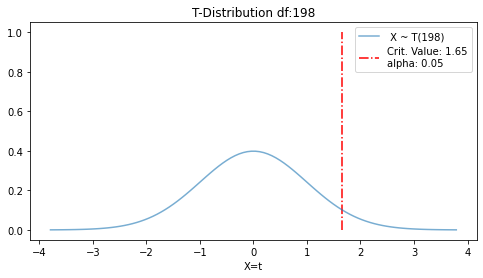

In [16]:
plot_t_critical(df=df)

## 2. ANOVA

A T test determines if two groups belong to the same distribution by comparing their means. When we have >2 groups, T tests between pairs without any correction are not a good idea, because they increase the type I error. Instead, we can use ANOVAs = Analysis of Variance. In ANOVAs, the significance of a factor is determined by comparing the variances of the groups, not the means.

**Key ideas**:
- If >2 groups -> ANOVA
- Factors / independent variables:
    - 1: One-way ANOVA
    - 2: Two-way ANOVA
    - Avoid more than 2-3 factors, since results are difficult to interpret later...
    - Keep in mind that each factor can have >=2 groups or levels
- Note on the dependent variables (the ones measured):
    - If one at a time: ANOVA
    - If more than one are analyzed together: MANOVA (multivariate)
- General procedure: 

**Typical examples**:
- We want to check the effect of a new drug admnistered in 3 different dossages (low, medium, high): one-way ANOVA (one factor) with 3 levels
- We want to check the effect of school scores depending on cell usage time (low, medium, high) and gender (boys, girls): two-way ANOVA (2 factors: cell usage and gender) with 3 and 2 levels, respectively.

**Types of ANOVAs**:
- Number of factors: depending on the number of independent variables or factors chosen, we can have one-way, two-way, etc. ANOVAS.
    - Avoid performing studies with more than 3 factors, because these are difficult to interpret
    - If we have 1+ factor, ANOVAs are called multiple factor ANOVAs
    - Multi-factor ANOVAs require
        - Main effect significance analysis for each factor
        - Interaction effects between factors pairwise
        - So, for a two-way ANOVA, 3 one-way ANOVAs are really performed:
            - 2 for main effects of each factor
            - 1 for interaction effects between the 2 factors
        - Interaction plots are useful for multi-factor ANOVAs: means plotted for each factor-level combination
- Between vs. within
    - Between studies work with independent samples, i.e., groups of participants or objets measured are different ans are note related
    - Within studies (aka. repeated measures) have related groups, e.g., the same sample of participants carries out the same set of experiments.
    - By default, between studies are considered.
    - If a within study is carried out, the tests must be modified, because the computation of variances within & between groups is different, thus, the statistic checked in the F distribution is different.

**Computation steps and the F distribution** (usually that's done automatically):
- We define groups (k) and observations (N = sum(n_k))
    - a group (k, eg: 1, 2, 3) is a set of measurements with a determined set of levels for the factors
    - an observation is a data point or measurement in a group; we can have different amounts of observations per group n_k (n_1, n_2, n_3), and all observations amount to N = sum(n_k)
- For each group, its mean and variance are computed with their observations; additionally the total mean is computed
- Then, the within-groups and between-groups variances are computed:
    - Var_b (MSB, mean square between): Between-groups variance: variance of the group means wrt the total mean
    - Var_w (MSE, mean square error/within): Withing-groups variance: weighted sum of all group variances (weighted with the number of observations)
- The quotient of both variances is the statistic F = Var_b / Var_w = MSB / MSE
    - A higher F value means the variance between the groups is higher, thus groups are significantly different
    - We check if the value F leads to significant differences in the F distribution
- The F distribution gives the p-value of significance for each factor, given
    - The F statistic
    - `df1` = `k - 1`, groups (between)
    - `df2` = `N - k`, observations (within)    
- The F distribution changes in shape depending on the de grees of freedom and it's asymmetrical = only one-sided tests can be performed, i.e., we check that distirbutions are different in any direction, not a specific direction (bigger, smaller).

A factor has a significant effect. Now what?
**Compare levels pairwise in a post-hoc analysis**:
- Once we have a factor which is significant, we can check whether there are differences between the levels or groups in the factor
- We cannot apply a simple T test between levels, because that increases the type I error
- Instead, we could apply the Bonferroni correction with which we decrease the significance level: `alpha'` = `alpha / k`, `k`; number of levels
- However, there are many other alternatives to the rather conservative Bonferroni procedure
- A very good choice is the Tukey Honestly Significant Difference (HSD) test

**Assumptions**:
- Random sampling
- Normality: Within each group, dependent variable must be normally distributed
- Homoscedaticity: group standard deviations must be equal, although means can be different; rule of thumb: max(s)/min(s) < 2
- For within studies / repeated measures: sphericity (see below)

**Notes on repeated measures studies**:
- Repeated measures analyses require modified computations and tests
    - Means of subjects or repeated objects are added as an extra measurement
    - The error or variance introduced by the subjects is computed and substracted to the within-groups variance (MSE)
    - Since F = MSB/ MSE, F increases -> more probable significances appear (lower p-values)
- All this is not done manually - see for instance `statsmodels.stats.anova.AnovaRM`
- Additionally, spherecity must be checked: sphericity is met when the variances of all the differences between levels are similar
    - We basically compute the differences between levels and then obtain their variances: these must be similar
    - Thus, spherecity can be checked only iff we have 3 or more levels (no matter how many factors)
    - Test for checking sphericity: Maulchy's test, W
    - If sphericity is violated, we can either perform MANOVA, or continue with ANOVA but correcting the `df`s with `epsilon`
        - `epsilon` in [1/(k-1),1], a value is chosen according to Greehouse-Geisser or Huynd-Feldt
        - `df`' = `epsilon` * `df`
        - F statistic does not change (because `epsilon` cancels in the quotient), but the distribution F does!

### 2.1 One-Way ANOVA

#### Data

In [17]:
import numpy as np
from scipy.stats import norm,f
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# We could use a popular available dataset, eg. iris
# We have 1 factor: species
# We choose a dependent variable, eg, petal_length
# We end up having a one-way ANOVA (factor species) with 3 levels (setosa, versicolor, virginica)
iris = sns.load_dataset('iris')

In [19]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

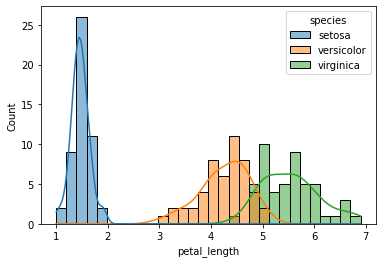

In [20]:
sns.histplot(data=iris,x='petal_length',hue='species',bins=30,kde=True)

In [21]:
# But I use synthetically generated data
# Same pattern: one-way ANOVA with 3 levels
N = 100
# Gaussian distributed data with mean = 0 and var = 1
a = np.random.randn(N)
# Gaussian distributed data with with mean = 2 and var = 1
b = np.random.randn(N) + 2
# Gaussian distributed data with with mean = 4 and var = 1
c = np.random.randn(N) + 4

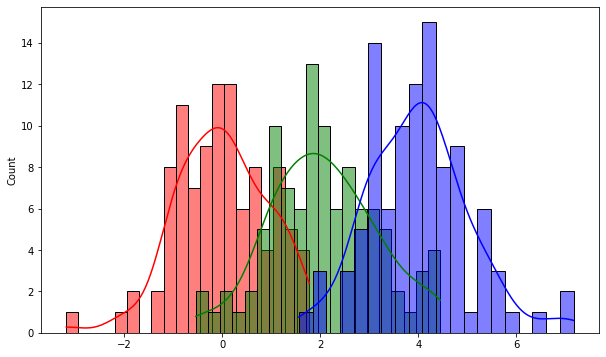

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=a,color='red',kde=True,bins=20)
sns.histplot(data=b,color='green',kde=True,bins=20)
sns.histplot(data=c,color='blue',kde=True,bins=20)

#### Test

After we check the assumptions (**normality** and **equal variances**), we can perform the tests.

In [23]:
import scipy.stats as stats

In [24]:
# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.
# The test is applied to samples from two or more groups, possibly with differing sizes.
# Returned: F statistic, p-value
# Iff p-value < alpha = 0.05 -> groups are significantly different
F, p = stats.f_oneway(a,b,c)

In [27]:
print('F = {}, p-value = {}'.format(F,p))

F = 391.8633782376389, p-value = 4.983345626198808e-84


#### More Tests: statsmodels

The package `statsmodels` provides verz useful resources to obtain more details on the ANOVA.
We can also perfor two-way ANOVAs.

```bash
conda install statsmodels
```

**Warning:** I have some dependencz issues on my mac.

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

ImportError: cannot import name 'datetools'

In [101]:
# We need to create a data dataframe with the data
columns = ['target']
dfa = pd.DataFrame(a,columns=columns)
dfa['type'] = 'a'
dfb = pd.DataFrame(b,columns=columns)
dfb['type'] = 'b'
dfc = pd.DataFrame(c,columns=columns)
dfc['type'] = 'c'
df = pd.concat([dfa,dfb,dfc],axis=0)
#df.reset_index()

In [102]:
# Statsmodels takes formulas in R style: 'target ~ variable1 + variable2 + variable1*variable2'
# variable1*variable2 accounts for the interaction component
# string variables are treated automatically as cetegorical values;
# if we have integers that should be categorical, we use them in the formula with C():
# C(variable1)
# OLS: Ordinary Least Squares
# OLS performs also an ANOVA: Dfs, F-statistic, Prob(F), etc. are listed!
model = ols('target ~ type',data=df)
results = model.fit()

In [103]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     391.9
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           4.98e-84
Time:                        17:47:23   Log-Likelihood:                -428.31
No. Observations:                 300   AIC:                             862.6
Df Residuals:                     297   BIC:                             873.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0128      0.101     -0.126      0.8

Some intepretation hints of the `results.summary()` table:
- Durbin-Watson (DB) checks whether errors are normally distributed with mean 0 and statationary; DB should be in [1.5, 2.5]
- The column `coef` contains the
    - intercept: mean of our first condition `a`
    - the difference to add of each additional condition to obtain its mean: mean(b) = coef(a) + coef(b)

In [104]:
# With the results, we can obtain the ANOVA table too
# F-statistic = variance between groups / variance within groups
# Variance Between: Mean Squared Between = MSB / (k-1)
# Variance Within: Mean Squared Error = MSE / (N-k)
# MSB = sum of the squared error between each group mean and the overall mean
# MSE = sum of the squared error between each observation and its own group mean
# k = number of groups (degrees of freedom)
# N = number of observations
# -- In our example
# MSB = sum_sq type / df groups
# MSE = sum_sq Residual / df observations
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

              sum_sq     df           F        PR(>F)
type      805.655509    2.0  391.863378  4.983346e-84
Residual  305.310089  297.0         NaN           NaN


### 2.2 Post-hoc Analysis: Tukey Honestly Significant Difference (HSD)

In [106]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [109]:
# Tukey HSD can be used only when a factor is significant
# In that case, we compare whether there are differences between the levels or groups in the factor
# Another option would be using the Bonferroni correction, but Bonferroni is more conservative, thus less powerful
# Tukey uses as H0 that the means of level pairs are the same
# Thus, if a pair has 'rejecet = True', their means are different!
tukey = pairwise_tukeyhsd(df['target'],df['type'],alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     a      b   2.0765 0.001 1.7388 2.4143   True
     a      c   4.0133 0.001 3.6755 4.3511   True
     b      c   1.9368 0.001  1.599 2.2745   True
-------------------------------------------------


### 2.3 Plotting the F Distribution

#### Shape of the F Distribution Depending on Its dfs

In [27]:
from scipy.stats import f, norm

In [28]:
df1_values = [2, 5, 10]
df2_values = [10, 20, 100]
linecolors = ['red', 'green', 'blue']
x = np.linspace(0.01, 10, 100)

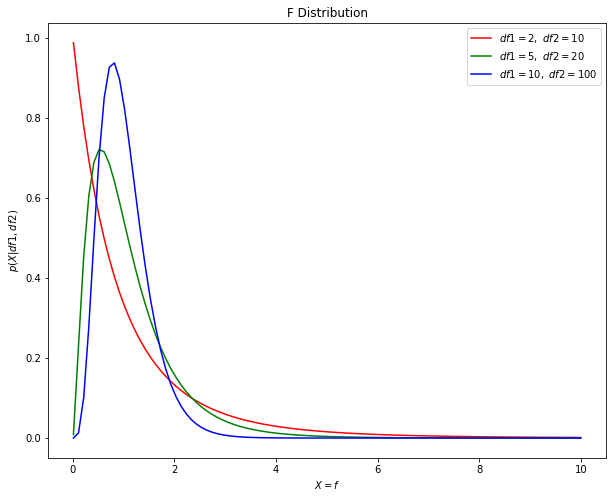

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
for (df1, df2, lc) in zip(df1_values, df2_values, linecolors):
    dist = f(df1, df2)
    plt.plot(x, dist.pdf(x), color=lc, label='$df1={},\ df2={}$'.format(df1, df2))
plt.xlabel('$X=f$')
plt.ylabel('$p(X|df1, df2)$')
plt.title('F Distribution')
plt.legend()

#### Critical F

In [61]:
def plot_f_critical(df1,df2,alpha=0.05):
    # Set figure 
    plt.figure(figsize=(8, 4))
    # T distribution with df
    dist = f(df1,df2)
    # f range (x)
    x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
    # Critical value; PPF is the inverse of CDF
    f_crit = dist.ppf(1-alpha)
    # Plot values
    plt.plot(x, dist.pdf(x), alpha=0.6, label=' X ~ F({},{})'.format(df1,df2))
    plt.vlines(f_crit, 0.0, 1.0, color='red', linestyles="dashdot", label="Crit. Value: {:.2f}\nalpha: {:.2f}".format(f_crit,alpha))
    plt.legend()
    plt.title('F-Distribution, df1 = {}, df2 = {}'.format(df1,df2))
    plt.xlabel('X=f')

In [62]:
# df1 = groups = 3 = k
# df2 = observations = sum(n-1) = N - k
df1 = 3
df2 = len(a) + len(b) + len(c) - df1

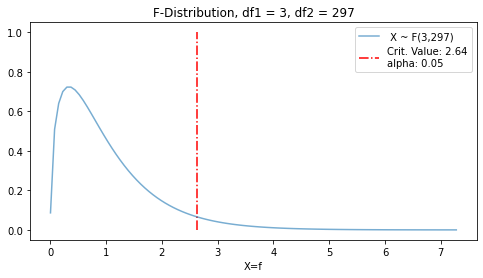

In [63]:
plot_f_critical(df1,df2)

### 2.4 Two-Way ANOVA

The procedure is equivalent, but we use the `statsmodels` package.

In [86]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [87]:
# Synthetic data
# 2 factors, 2 levels each
# Factor1: a, b
# Factor2: 1, 2
N = 100
# Gaussian distributed data with mean = 0 and var = 1
a1 = np.random.randn(N)
# Gaussian distributed data with with mean = 2 and var = 1
a2 = np.random.randn(N) + 2
# Gaussian distributed data with with mean = 4 and var = 1
b1 = np.random.randn(N) + 4
# Gaussian distributed data with with mean = 6 and var = 1
b2 = np.random.randn(N) + 6

In [88]:
# We need to create a data dataframe with the data
columns = ['Measurement']
dfa1 = pd.DataFrame(a1,columns=columns)
dfa1['Factor1'] = 'a'
dfa1['Factor2'] = '1'
dfa2 = pd.DataFrame(a2,columns=columns)
dfa2['Factor1'] = 'a'
dfa2['Factor2'] = '2'
dfb1 = pd.DataFrame(b1,columns=columns)
dfb1['Factor1'] = 'b'
dfb1['Factor2'] = '1'
dfb2 = pd.DataFrame(b2,columns=columns)
dfb2['Factor1'] = 'b'
dfb2['Factor2'] = '2'
df = pd.concat([dfa1,dfa2,dfb1,dfb2],axis=0)
#df.reset_index()

In [89]:
df.head()

,Measurement,Factor1,Factor2
0,-1.007363,a,1
1,0.093136,a,1
2,-0.393508,a,1
3,0.965901,a,1
4,-0.034732,a,1


In [93]:
# Statsmodels takes formulas in R style: 'target ~ variable1 + variable2 + variable1*variable2'
# variable1*variable2 accounts for the interaction component
# string variables are treated automatically as cetegorical values;
# if we have integers that should be categorical, we use them in the formula with C():
# C(variable1)
# OLS: Ordinary Least Squares
# OLS performs also an ANOVA: Dfs, F-statistic, Prob(F), etc. are listed!
model = ols('Measurement ~ Factor1 + Factor2 + Factor1*Factor2',data=df)
results = model.fit()

In [94]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Measurement   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     666.9
Date:                Tue, 16 Feb 2021   Prob (F-statistic):          2.18e-154
Time:                        16:35:33   Log-Likelihood:                -583.57
No. Observations:                 400   AIC:                             1175.
Df Residuals:                     396   BIC:                             1191.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [95]:
# With the results, we can obtain the ANOVA table too
# F-statistic = variance between groups / variance within groups
# Variance Between: Mean Squared Between = MSB / (k-1)
# Variance Within: Mean Squared Error = MSE / (N-k)
# MSB = sum of the squared error between each group mean and the overall mean
# MSE = sum of the squared error between each observation and its own group mean
# k = number of groups (degrees of freedom)
# N = number of observations
# -- In our example
# MSB = sum_sq Factor / df groups
# MSE = sum_sq Residual / df observations
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

                      sum_sq     df            F         PR(>F)
Factor1          1723.714823    1.0  1575.281278  4.311856e-140
Factor2           465.595686    1.0   425.502037   9.903696e-65
Factor1:Factor2     0.029839    1.0     0.027270   8.689215e-01
Residual          433.313770  396.0          NaN            NaN


## 3. Goodness of Fit

## 4. Acceptance sampling

## 5. Correlation

## 6. Assumption Checks

### 6.1 Normality

Normality is assumed by
- T tests
- ANOVA

It can be visually inspected using QQ plots or with normality tests.

In [57]:
# Sythetic measurements
N = 50
# Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
# Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

#### Boxplots and Histograms

It always makes sense plotting histograms and boxplots.

<AxesSubplot:ylabel='Count'>

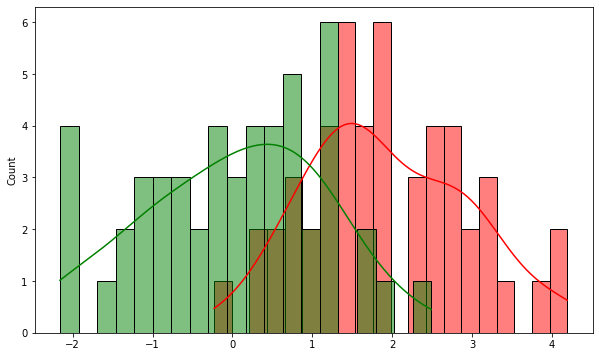

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(data=a,color='red',kde=True,bins=20)
sns.histplot(data=b,color='green',kde=True,bins=20)

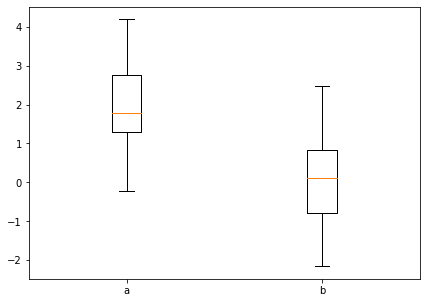

In [74]:
plt.figure(figsize=(7,5))
plt.boxplot((a,b),labels=['a','b'])
plt.show()

#### QQ Plots

In QQ or quantile-quantile plots data points x_i are ordered and their quantile q_i is computed according to their ordered position. Then the z_i statistic (the variable of the normal distribution) of each q_i computed.
Finally, z_i vs x_i is plotted in a scatterplot.
**Ideally all points should lie in the central line.**

**Important note**: we can use any comparison distribution, not only the normal with z; this way, we can visually inspect how well our data fits any given distribution.

In [91]:
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as stats
%matplotlib inline

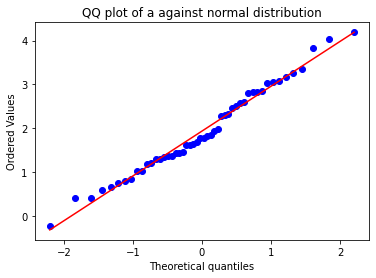

In [92]:
stats.probplot(a, dist="norm", plot=plt)
plt.title('QQ plot of a against normal distribution')
plt.show()

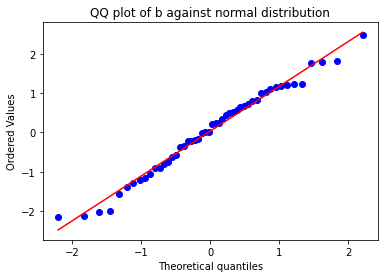

In [93]:
stats.probplot(b, dist="norm", plot=plt)
plt.title('QQ plot of b against normal distribution')
plt.show()

#### Shapiro-Wilk Normality Test

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [89]:
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
# Since H0 is normality, in contrast to other tests, here normality is rejected iff p < 0.05
# Statistic W and p returned
W, p = stats.shapiro(a)

In [90]:
print('Shapiro-Wilk W, p = {}, {}'.format(W,p))

Shapiro-Wilk W, p = 0.9807938933372498, 0.5858984589576721


### 6.2 Homoscedaticity = Equal Variances

The assumption of equal variances is done by ANOVA tests.

In [128]:
# Sythetic measurements
N = 50
# Gaussian distributed data with mean = 0 and var = 1
a = np.random.randn(N)
# Gaussian distributed data with with mean = 2 and var = 1
b = np.random.randn(N) + 2
# Gaussian distributed data with with mean = 4 and var = 1
c = np.random.randn(N) + 4

#### Rule of Thumb Variance Check

In [122]:
a.var()

0.97200725011461

In [123]:
b.var()

0.8475387096724285

In [124]:
c.var()

0.6644109387835125

In [125]:
# A quick rule of thumb can be to check that max(s)/min(s) < 2

In [127]:
max(a.std(), b.std(), c.std()) / min(a.std(), b.std(), c.std())

1.2095292215738713

#### Boxplot

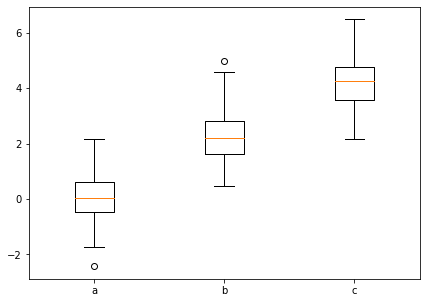

In [129]:
plt.figure(figsize=(7,5))
plt.boxplot((a,b,c),labels=['a','b','c'])
plt.show()

#### Bartlett's test & Levene's test

Bartlett's test tests the null hypothesis that all input samples are from populations with equal variances. For samples
from significantly non-normal populations, Levene's test is more robust.

In [132]:
# The Bartlett's test tests the null hypothesis that the data was drawn from populations with equal variances.
# Since H0 is homoscedasticity, in contrast to other tests, here equal variances are rejected iff p < 0.05
stats.bartlett(a,b,c)

BartlettResult(statistic=0.2416770870819695, pvalue=0.8861770270478303)

In [133]:
# The Levene's test tests the null hypothesis that the data was drawn from populations with equal variances.
# Since H0 is homoscedasticity, in contrast to other tests, here equal variances are rejected iff p < 0.05
# Levene's test is more robust that Bartlett's if samples from significantly non-normal populations.
stats.levene(a,b,c)

LeveneResult(statistic=0.1721065106363276, pvalue=0.8420588924888823)